# Weapons & Circumstances cosine similarity for Female Victims

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity

import pickle as pk

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

## Data

In [2]:
map_data = pd.read_csv('../data/SHR65_22.csv', index_col=0)
map_data.head()

CNTYFIPS      Ori    State          Agency  \
ID                                                                  
197601001AKASP00     Juneau, AK  AKASP00   Alaska  State Troopers   
197601001AL00102  Jefferson, AL  AL00102  Alabama      Birmingham   
197601001AL00104  Jefferson, AL  AL00104  Alabama       Fairfield   
197601001AL00106  Jefferson, AL  AL00106  Alabama           Leeds   
197601001AL00201     Mobile, AL  AL00201  Alabama          Mobile   

                          Agentype Source Solved  Year    Month  Incident  \
ID                                                                          
197601001AKASP00  Primary state LE    FBI    Yes  1976  January         1   
197601001AL00102  Municipal police    FBI    Yes  1976  January         1   
197601001AL00104  Municipal police    FBI    Yes  1976  January         1   
197601001AL00106  Municipal police    FBI    Yes  1976  January         1   
197601001AL00201  Municipal police    FBI    Yes  1976  January         1   

                  ...                            OffRace  \
ID                ...                                      
197601001AKASP00  ...  American Indian or Alaskan Native   
197601001AL00102  ...                              Black   
197601001AL00104  ...                              Black   
197601001AL00106  ...                              Black   
197601001AL00201  ...                              White   

                                OffEthnic                       Weapon  \
ID                                                                       
197601001AKASP00  Unknown or not reported  Knife or cutting instrument   
197601001AL00102  Unknown or not reported                      Shotgun   
197601001AL00104  Unknown or not reported                      Shotgun   
197601001AL00106  Unknown or not reported  Knife or cutting instrument   
197601001AL00201  Unknown or not reported      Strangulation - hanging   

                  Relationship                     Circumstance  \
ID                                                                
197601001AKASP00       Husband                  Other arguments   
197601001AL00102  Acquaintance  Felon killed by private citizen   
197601001AL00104          Wife                            Other   
197601001AL00106       Brother                  Other arguments   
197601001AL00201  Acquaintance       Circumstances undetermined   

                                              Subcircum VicCount  OffCount  \
ID                                                                           
197601001AKASP00                                    NaN        0         0   
197601001AL00102  Felon killed in commission of a crime        0         0   
197601001AL00104                                    NaN        0         0   
197601001AL00106                                    NaN        0         0   
197601001AL00201                                    NaN        0         0   

                 FileDate                    MSA  
ID                                                
197601001AKASP00  30180.0           Rural Alaska  
197601001AL00102  30180.0  Birmingham-Hoover, AL  
197601001AL00104  30180.0  Birmingham-Hoover, AL  
197601001AL00106  30180.0  Birmingham-Hoover, AL  
197601001AL00201  30180.0             Mobile, AL  

[5 rows x 29 columns]

In [3]:
outliers = [
    {
        'name': 'Strangulation - hanging',
        'Texas': [1976, 1981],
        'Maryland': [1992, 1998],
        'California': [[1976, 1987], [2013, 2020]],
        'Oregon': [1997, 2003]
    },
    {
        'name': 'Fire',
        'Pennsylvania': [1976, 1990],
        'New York': [[1976, 1989], [1992, 1996]],
        'New Jersey': [1979, 1990],
        'California': [1989, 1998]
    },
    {
        'name': 'Other gun',
        'North Carolina': [1998, 2018]
    }
]

In [4]:
map_data['Weapon'].unique()

array(['Knife or cutting instrument', 'Shotgun',
       'Strangulation - hanging', 'Rifle',
       'Handgun - pistol, revolver, etc',
       'Personal weapons, includes beating', 'Fire',
       'Other or type unknown', 'Firearm, type not stated',
       'Asphyxiation - includes death by gas',
       'Narcotics or drugs, sleeping pills',
       'Blunt object - hammer, club, etc', 'Drowning',
       'Pushed or thrown out window', 'Other gun',
       'Poison - does not include gas', 'Explosives',
       'Weapon Not Reported'], dtype=object)

In [4]:
df = map_data[(map_data['Weapon']=='Strangulation - hanging')
              & (map_data['State']=='Texas')
              & (map_data['VicSex']=='Female')
              & (map_data['Year'].between(1976, 1981))]
df.head()

CNTYFIPS      Ori  State       Agency          Agentype  \
ID                                                                              
197602001TX03400      Cass, TX  TX03400  Texas  Cass County           Sheriff   
197602001TX03401      Cass, TX  TX03401  Texas      Atlanta  Municipal police   
197603015TXDPD00    Dallas, TX  TXDPD00  Texas       Dallas  Municipal police   
197604019TXHPD00    Harris, TX  TXHPD00  Texas      Houston  Municipal police   
197606001TX23501  Victoria, TX  TX23501  Texas     Victoria  Municipal police   

                 Source Solved  Year     Month  Incident  ...  OffRace  \
ID                                                        ...            
197602001TX03400    FBI    Yes  1976  February         1  ...    Black   
197602001TX03401    FBI    Yes  1976  February         1  ...    Black   
197603015TXDPD00    FBI     No  1976     March        15  ...  Unknown   
197604019TXHPD00    FBI    Yes  1976     April        19  ...    White   
197606001TX23501    FBI     No  1976      June         1  ...  Unknown   

                                OffEthnic                   Weapon  \
ID                                                                   
197602001TX03400  Unknown or not reported  Strangulation - hanging   
197602001TX03401  Unknown or not reported  Strangulation - hanging   
197603015TXDPD00  Unknown or not reported  Strangulation - hanging   
197604019TXHPD00  Unknown or not reported  Strangulation - hanging   
197606001TX23501  Unknown or not reported  Strangulation - hanging   

                                 Relationship Circumstance Subcircum VicCount  \
ID                                                                              
197602001TX03400      Other - known to victim        Other       NaN        0   
197602001TX03401                 Acquaintance        Other       NaN        0   
197603015TXDPD00  Relationship not determined        Other       NaN        0   
197604019TXHPD00                     Daughter        Other       NaN        0   
197606001TX23501  Relationship not determined        Other       NaN        0   

                  OffCount FileDate                              MSA  
ID                                                                    
197602001TX03400         0  30180.0                      Rural Texas  
197602001TX03401         0  30180.0                      Rural Texas  
197603015TXDPD00         0  30180.0  Dallas-Fort Worth-Arlington, TX  
197604019TXHPD00         0  30180.0   Houston-Sugar Land-Baytown, TX  
197606001TX23501         0  30180.0                     Victoria, TX  

[5 rows x 29 columns]

In [14]:
df.shape

(90, 29)

In [17]:
norm = map_data[(map_data['Weapon']=='Strangulation - hanging')
                & (map_data['State']=='Texas')
                & (map_data['VicSex']=='Female')
                & (~map_data['Year'].between(1976, 1981))]

norm.groupby('Solved').mean()

Year  Incident     VicAge      OffAge  VicCount  OffCount  \
Solved                                                                     
No      1994.385593  6.822034  93.716102  999.000000  0.042373  0.000000   
Yes     1998.705882  5.128028  50.013841   68.432526  0.100346  0.190311   

            FileDate  
Solved                
No      59665.152542  
Yes     62066.269896

In [5]:
df.groupby('Solved').mean()

Year   Incident     VicAge      OffAge  VicCount  OffCount  \
Solved                                                                      
No      1979.156863  11.470588  87.137255  999.000000  0.039216  0.000000   
Yes     1978.794872   5.641026  40.846154  101.487179  0.051282  0.076923   

            FileDate  
Solved                
No      36233.529412  
Yes     32506.230769

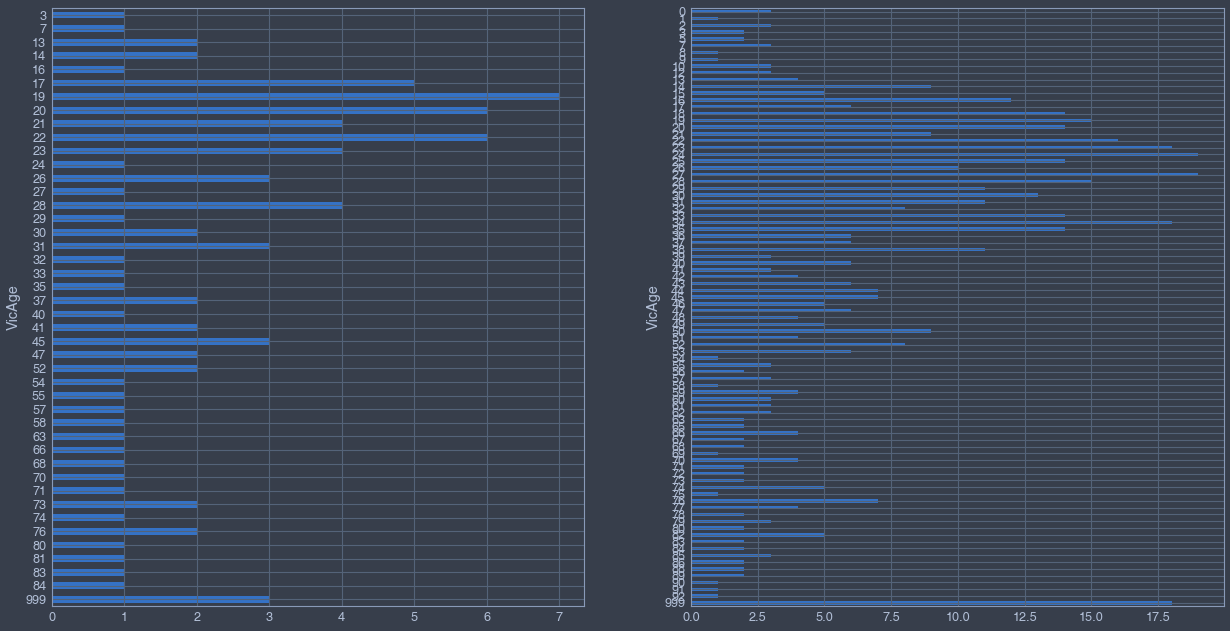

In [18]:
figure, ax = plt.subplots(1, 2, figsize=(21, 11))
df.groupby('VicAge').count()['Ori'].plot(kind='barh', ax=ax[0]).invert_yaxis()
norm.groupby('VicAge').count()['Ori'].plot(kind='barh', ax=ax[1]).invert_yaxis()

In [20]:
norm.groupby('VicRace').count()

CNTYFIPS  Ori  State  Agency  Agentype  \
VicRace                                                                     
American Indian or Alaskan Native         1    1      1       1         1   
Asian                                     4    4      4       4         4   
Black                                   123  123    123     123       123   
Unknown                                   4    4      4       4         4   
White                                   393  393    393     393       393   

                                   Source  Solved  Year  Month  Incident  ...  \
VicRace                                                                   ...   
American Indian or Alaskan Native       1       1     1      1         1  ...   
Asian                                   4       4     4      4         4  ...   
Black                                 123     123   123    123       123  ...   
Unknown                                 4       4     4      4         4  ...   
White                                 393     393   393    393       393  ...   

                                   OffRace  OffEthnic  Weapon  Relationship  \
VicRace                                                                       
American Indian or Alaskan Native        1          1       1             1   
Asian                                    4          4       4             4   
Black                                  123        123     123           123   
Unknown                                  4          4       4             4   
White                                  393        393     393           393   

                                   Circumstance  Subcircum  VicCount  \
VicRace                                                                
American Indian or Alaskan Native             1          0         1   
Asian                                         4          0         4   
Black                                       123          0       123   
Unknown                                       4          0         4   
White                                       393          0       393   

                                   OffCount  FileDate  MSA  
VicRace                                                     
American Indian or Alaskan Native         1         1    1  
Asian                                     4         4    4  
Black                                   123       123  123  
Unknown                                   4         4    4  
White                                   393       393  393  

[5 rows x 28 columns]

In [24]:
norm[norm['Solved']=='No'].groupby('VicRace').count()

CNTYFIPS  Ori  State  Agency  Agentype  \
VicRace                                                                     
American Indian or Alaskan Native         1    1      1       1         1   
Asian                                     3    3      3       3         3   
Black                                    61   61     61      61        61   
Unknown                                   2    2      2       2         2   
White                                   169  169    169     169       169   

                                   Source  Solved  Year  Month  Incident  ...  \
VicRace                                                                   ...   
American Indian or Alaskan Native       1       1     1      1         1  ...   
Asian                                   3       3     3      3         3  ...   
Black                                  61      61    61     61        61  ...   
Unknown                                 2       2     2      2         2  ...   
White                                 169     169   169    169       169  ...   

                                   OffRace  OffEthnic  Weapon  Relationship  \
VicRace                                                                       
American Indian or Alaskan Native        1          1       1             1   
Asian                                    3          3       3             3   
Black                                   61         61      61            61   
Unknown                                  2          2       2             2   
White                                  169        169     169           169   

                                   Circumstance  Subcircum  VicCount  \
VicRace                                                                
American Indian or Alaskan Native             1          0         1   
Asian                                         3          0         3   
Black                                        61          0        61   
Unknown                                       2          0         2   
White                                       169          0       169   

                                   OffCount  FileDate  MSA  
VicRace                                                     
American Indian or Alaskan Native         1         1    1  
Asian                                     3         3    3  
Black                                    61        61   61  
Unknown                                   2         2    2  
White                                   169       169  169  

[5 rows x 28 columns]

In [22]:
df.groupby('VicRace').count()

CNTYFIPS  Ori  State  Agency  Agentype  Source  Solved  Year  Month  \
VicRace                                                                        
Black          24   24     24      24        24      24      24    24     24   
White          66   66     66      66        66      66      66    66     66   

         Incident  ...  OffRace  OffEthnic  Weapon  Relationship  \
VicRace            ...                                             
Black          24  ...       24         24      24            24   
White          66  ...       66         66      66            66   

         Circumstance  Subcircum  VicCount  OffCount  FileDate  MSA  
VicRace                                                              
Black              24          0        24        24        24   24  
White              66          0        66        66        66   66  

[2 rows x 28 columns]

In [25]:
df[df['Solved']=='No'].groupby('VicRace').count()

CNTYFIPS  Ori  State  Agency  Agentype  Source  Solved  Year  Month  \
VicRace                                                                        
Black          17   17     17      17        17      17      17    17     17   
White          34   34     34      34        34      34      34    34     34   

         Incident  ...  OffRace  OffEthnic  Weapon  Relationship  \
VicRace            ...                                             
Black          17  ...       17         17      17            17   
White          34  ...       34         34      34            34   

         Circumstance  Subcircum  VicCount  OffCount  FileDate  MSA  
VicRace                                                              
Black              17          0        17        17        17   17  
White              34          0        34        34        34   34  

[2 rows x 28 columns]

In [33]:
df.groupby('CNTYFIPS').count()

Ori  State  Agency  Agentype  Source  Solved  Year  Month  \
CNTYFIPS                                                                    
Angelina, TX      1      1       1         1       1       1     1      1   
Bell, TX          1      1       1         1       1       1     1      1   
Bexar, TX         7      7       7         7       7       7     7      7   
Cameron, TX       2      2       2         2       2       2     2      2   
Cass, TX          2      2       2         2       2       2     2      2   
Collin, TX        1      1       1         1       1       1     1      1   
Dallas, TX       19     19      19        19      19      19    19     19   
Denton, TX        1      1       1         1       1       1     1      1   
Ector, TX         1      1       1         1       1       1     1      1   
El Paso, TX       5      5       5         5       5       5     5      5   
Fort Bend, TX     1      1       1         1       1       1     1      1   
Gonzales, TX      1      1       1         1       1       1     1      1   
Gregg, TX         2      2       2         2       2       2     2      2   
Harris, TX       26     26      26        26      26      26    26     26   
Jefferson, TX     1      1       1         1       1       1     1      1   
Montgomery, TX    1      1       1         1       1       1     1      1   
Robertson, TX     1      1       1         1       1       1     1      1   
Sabine, TX        1      1       1         1       1       1     1      1   
Smith, TX         1      1       1         1       1       1     1      1   
Tarrant, TX       5      5       5         5       5       5     5      5   
Taylor, TX        1      1       1         1       1       1     1      1   
Terry, TX         1      1       1         1       1       1     1      1   
Travis, TX        7      7       7         7       7       7     7      7   
Victoria, TX      1      1       1         1       1       1     1      1   

                Incident  ActionType  ...  OffRace  OffEthnic  Weapon  \
CNTYFIPS                              ...                               
Angelina, TX           1           1  ...        1          1       1   
Bell, TX               1           1  ...        1          1       1   
Bexar, TX              7           7  ...        7          7       7   
Cameron, TX            2           2  ...        2          2       2   
Cass, TX               2           2  ...        2          2       2   
Collin, TX             1           1  ...        1          1       1   
Dallas, TX            19          19  ...       19         19      19   
Denton, TX             1           1  ...        1          1       1   
Ector, TX              1           1  ...        1          1       1   
El Paso, TX            5           5  ...        5          5       5   
Fort Bend, TX          1           1  ...        1          1       1   
Gonzales, TX           1           1  ...        1          1       1   
Gregg, TX              2           2  ...        2          2       2   
Harris, TX            26          26  ...       26         26      26   
Jefferson, TX          1           1  ...        1          1       1   
Montgomery, TX         1           1  ...        1          1       1   
Robertson, TX          1           1  ...        1          1       1   
Sabine, TX             1           1  ...        1          1       1   
Smith, TX              1           1  ...        1          1       1   
Tarrant, TX            5           5  ...        5          5       5   
Taylor, TX             1           1  ...        1          1       1   
Terry, TX              1           1  ...        1          1       1   
Travis, TX             7           7  ...        7          7       7   
Victoria, TX           1           1  ...        1          1       1   

                Relationship  Circumstance  Subcircum  VicCount  OffCount  \
CNTYFIPS                             

In [34]:
norm.groupby('CNTYFIPS').count()

Ori  State  Agency  Agentype  Source  Solved  Year  Month  \
CNTYFIPS                                                                    
Anderson, TX      3      3       3         3       3       3     3      3   
Angelina, TX      1      1       1         1       1       1     1      1   
Archer, TX        1      1       1         1       1       1     1      1   
Atascosa, TX      1      1       1         1       1       1     1      1   
Bastrop, TX       2      2       2         2       2       2     2      2   
...             ...    ...     ...       ...     ...     ...   ...    ...   
Wharton, TX       2      2       2         2       2       2     2      2   
Wichita, TX       2      2       2         2       2       2     2      2   
Williamson, TX    3      3       3         3       3       3     3      3   
Wilson, TX        1      1       1         1       1       1     1      1   
Young, TX         1      1       1         1       1       1     1      1   

                Incident  ActionType  ...  OffRace  OffEthnic  Weapon  \
CNTYFIPS                              ...                               
Anderson, TX           3           3  ...        3          3       3   
Angelina, TX           1           1  ...        1          1       1   
Archer, TX             1           1  ...        1          1       1   
Atascosa, TX           1           1  ...        1          1       1   
Bastrop, TX            2           2  ...        2          2       2   
...                  ...         ...  ...      ...        ...     ...   
Wharton, TX            2           2  ...        2          2       2   
Wichita, TX            2           2  ...        2          2       2   
Williamson, TX         3           3  ...        3          3       3   
Wilson, TX             1           1  ...        1          1       1   
Young, TX              1           1  ...        1          1       1   

                Relationship  Circumstance  Subcircum  VicCount  OffCount  \
CNTYFIPS                                                                    
Anderson, TX               3             3          0         3         3   
Angelina, TX               1             1          0         1         1   
Archer, TX                 1             1          0         1         1   
Atascosa, TX               1             1          0         1         1   
Bastrop, TX                2             2          0         2         2   
...                      ...           ...        ...       ...       ...   
Wharton, TX                2             2          0         2         2   
Wichita, TX                2             2          0         2         2   
Williamson, TX             3             3          0         3         3   
Wilson, TX                 1             1          0         1         1   
Young, TX                  1             1          0         1         1   

                FileDate  MSA  
CNTYFIPS                       
Anderson, TX           3    3  
Angelina, TX           1    1  
Archer, TX             1    1  
Atascosa, TX           1    1  
Bastrop, TX            2    2  
...                  ...  ...  
Wharton, TX            2    2  
Wichita, TX            2    2  
Williamson, TX         3    3  
Wilson, TX             1    1  
Young, TX              1    1  

[84 rows x 28 columns]